### Matplotlib Object Oriented Programming Exercises

### Instructor note - This is a student (Amisha Bhanage)'s solution notebook

In this exercise we will write a class which will take a pandas dataframe and output a set of plots describing the dataframe. For this we will use data from http://earthquake.usgs.gov/ which maintains csv files corresponding to data of earthquake occurrences sorted according to earthquakes magnitude, ranging from significant only down to all earthquakes, major or minor. The csv files are available here 

In [1]:
feed="http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

In [2]:
import numpy as np
import pandas as pd
#import urllib2
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Check if you have the updated version of Matplotlib i.e 1.5.0. If not you can udate it using linux command sudo pip install --upgrade matplotlib for unix boxes and corresponding brew command for mac

In [3]:
print mpl.__version__

1.5.3


### Acquiring Data ###

For this assignment we will be working with the following csv files

1. Significant earthquakes in the last 30 days : feed + "significant_month.csv"
2. Magnitude > 4.5 : feed + "4.5_month.csv"
3. Magnitude > 2.5 : feed + "2.5_month.csv"
4. Magnitude > 1.0 : feed + "1.0_month.csv"

### Q1 (answered)
Write a function which takes an integer input from 1 to 4 and outputs a pandas dataframe corresponding to the csv file above. Note that the function should necessarily download the data from the website via internet.

In [4]:
filenames=["significant_month.csv",
           "4.5_month.csv",
           "2.5_month.csv",
           "1.0_month.csv"]
def download_data(i):
    url=feed+filenames[i-1];
    print 'downloading',url
    return pd.read_csv(url);

In [5]:
last_30 = download_data(1)
data_45 = download_data(2)
data_25 = download_data(3)
data_10 = download_data(4)
last_30.head()


downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_month.csv


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-11-16T15:10:11.230Z,-8.9671,113.1814,85.86,5.7,mww,NaN,33,1.079,1.13,...,2016-11-16T22:31:29.052Z,"72km SSW of Kepanjen, Indonesia",earthquake,6.5,4.3,NaN,NaN,reviewed,us,us
1,2016-11-14T00:34:22.530Z,-42.5856,173.2838,10.00,6.5,mww,NaN,56,0.253,1.13,...,2016-11-14T17:27:43.170Z,"38km WSW of Kaikoura, New Zealand",earthquake,4.4,1.7,NaN,NaN,reviewed,us,us
2,2016-11-13T13:31:26.630Z,-42.2914,173.6933,8.29,6.2,mww,NaN,61,0.169,0.69,...,2016-11-14T00:53:40.275Z,"12km N of Kaikoura, New Zealand",earthquake,4.3,3.2,NaN,NaN,reviewed,us,us
3,2016-11-13T11:32:07.310Z,-42.2536,173.6298,10.00,6.5,mww,NaN,31,0.175,1.77,...,2016-11-13T23:23:55.905Z,"17km NNW of Kaikoura, New Zealand",earthquake,4.5,1.7,NaN,NaN,reviewed,us,us
4,2016-11-13T11:02:56.970Z,-42.7568,173.0766,23.00,7.8,mww,NaN,143,0.482,0.88,...,2016-11-16T10:09:54.866Z,"53km NNE of Amberley, New Zealand",earthquake,3.3,2.0,NaN,NaN,reviewed,us,us


### Q2) Analyzing the data ###

In order to understand the data we will plot different attributes of the data using tools provided by matplotlib.
In order to do that, we will first create a class object for the given dataframe.

2.1) The class will have a set of functions to generate different plots. The first function will output a histogram taking column type as input. The column type is restricted to latitude or longitude. Take default interval size as 10 degrees

2.2) Write another function which when called will output a scatter plot of longitude vs. latitude. For extra credit represent each earthquake by a circle whose area is proporportional to the strength of the earthquake.

-179.9581 179.7095


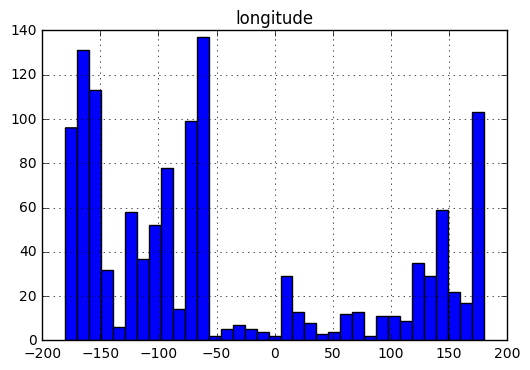

In [6]:
def DF_hist(df,col='longitude'):
    Min=df[col].min();
    Max=df[col].max();
    print Min,Max
    df.hist(column=col,bins=int((Max-Min)/10.0))
DF_hist(data_25)

In [7]:
class dataPlot(object):
    """dataPlot takes a pandas dataframe as input and outputs different plots correspondng to the input dataframe"""
    
    def __init__(self,df):
        self.df=df
        
    def histogram(self,col):
        if col in ['latitude', 'longitude']:
            Min=self.df[col].min();
            Max=self.df[col].max();
            self.df.hist(column=col,bins=int((Max-Min)/10.0))
            plt.title("Histogram Plot of " + col + ' of earthquake occurrences')
        else:
            print 'Please use latitude or longitude as Column Type'
        
    def scatter(self,col1,col2):
        figure()
        y=self.df[col1].values
        x=self.df[col2].values
        magnitude=[np.exp(i)*0.1 for i in self.df['mag'].values]
        N = len(self.df['mag'])
        colors = np.random.rand(N)
        xlabel(col2)
        ylabel(col1)
        title('Scatter Plot of '+col1 + ' and ' + col2 + ' of earthquake occurrences')

# Represent each earthquake by a circle whose area is proporportional to the strength of the earthquake i.e. magnitude
        plt.scatter(x,y, s=magnitude, c=colors, alpha=0.5)  
  


Please use latitude or longitude as Column Type


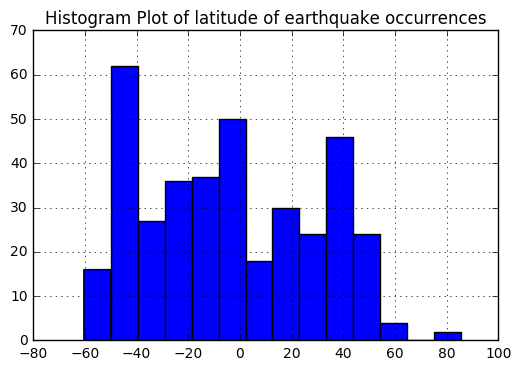

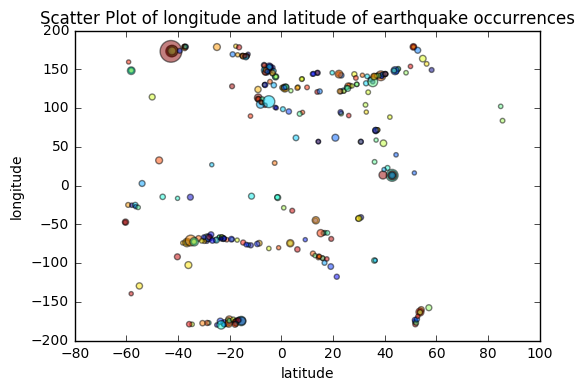

In [8]:
#The folloring command should now generate a histogram and a scatter-plot
D=dataPlot(data_45)
D.histogram('mag')
D.histogram('latitude')
D.scatter('longitude','latitude')

### Q3) Plotting data on the map ###

In the last class we had used basemap to plot the weather data. Now we will use basemap to plot the earthquake data, and further enhance it with a rain animation to indicate the severity of the incident. We will start initially with the dataset corresponding to earthquakes magnitude > 4.5

In [9]:
data_45 = download_data(2)

downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv


First we will import necessary libraries

In [10]:
from mpl_toolkits.basemap import Basemap

Next we will generate a figure canvas with a basemap projection. We will use the 'mill' projection of Basemap for this assignment. 

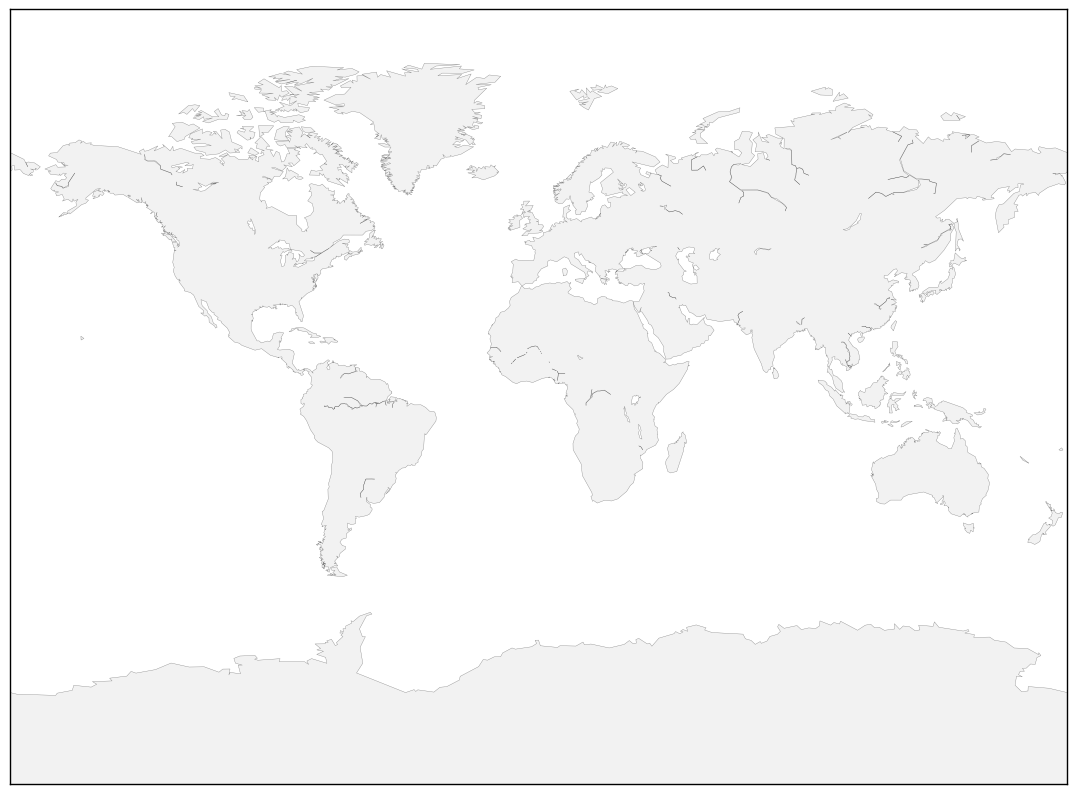

In [11]:
#General plot  initializations
fig = figure(figsize=(14,10))
ax = subplot(1,1,1)
earth = Basemap(projection='mill')
# We then draw coastlines and continents
earth.drawcoastlines(color='0.50', linewidth=0.25);
earth.fillcontinents(color='0.95');

### Q3) 

Consult the documentation about scatterplots on maps:
```
http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter
```
write a function that takes as input a dataframe and plots a map and on top of the map a circle at the location of each earthquake in the dataframe.

Use size to convey the intensity of each earthquake. Make the the circles semi-transparent so that the intensity of the color conveys the number of earthquakes that have occured.

Finally wrap the function in a class that has methods for plotting an array of scatterplots from the same data-frame, each for a different time period.

In [14]:
class scatterPlotArray(object):
    """dataPlot takes a pandas dataframe as input and outputs different plots correspondng to the input dataframe"""
    
    def __init__(self,df):
        self.df=df
 
        
    def scatterMap(self):
        fig = figure(figsize=(14,10))
        ax = subplot(1,1,1)
        earth = Basemap(projection='mill')
        # We then draw coastlines and continents
        earth.drawcoastlines(color='0.50', linewidth=0.25);
        earth.fillcontinents(color='b', alpha = 0.10);
        lons=self.df['longitude'].values
        lats=self.df['latitude'].values
        magnitude=[np.exp(i)*0.1 for i in self.df['mag'].values]
        x, y = earth(lons,lats)
        
    #    Convert col data type of time to timestamp
        self.df['time'] = pd.to_datetime(self.df['time'])
  
        
        #    Divide time period in weeks
        p = pd.date_range(self.df['time'].min(),self.df['time'].max(), freq='W')
        
        len_p = len(p)

        #  Add new columns for weeks 
    
        #Week 1
        df1 = self.df[( self.df.loc[:,'time'] < p[0])]
        df1.loc[:,'Week_No'] = 1
        df1.loc[:,'Weeks'] = 'Week 1: '+ str(self.df.loc[:,'time'].min()) +' to ' +   str(p[0])
        df = df1
        
        # Week 2 to total weeks -1
        for i in range(len_p-1):
            df2 = None
            df2 = self.df[(self.df.loc[:,'time'] >= p[i]) & (self.df.loc[:,'time'] < p[i+1])] 
            df2.loc[:,'Week_No']= i+2
            df2.loc[:,'Weeks'] = 'Week '+ str(i+2) +': '+str(p[i]) +' to ' + str(p[i+1])
            df = df.append(df2)

        # Last week    
        df3 = self.df[( self.df.loc[:,'time'] >= p[len_p-1])]
        df3.loc[:,'Week_No'] = len_p+1
        df3.loc[:,'Weeks'] = 'Week '+ str(len_p+1) +': '+ str(p[len_p-1]) +' to ' +  str(self.df.loc[:,'time'].max()) 
        df = df.append(df3)
    
      
        N = len(df.loc[:,'Week_No'].unique())
        colrs = np.random.rand(N)
        df_col = df[(df.loc[:,'Week_No'] == N)]
        df_col.loc[:,'Use_Colors'] = colrs[N-1]  
        dfc = df_col  
        for i in range(N-1):
            df_col = None 
            df_col = df[(df.loc[:,'Week_No'] == i+1)]
            df_col.loc[:,'Use_Colors'] = colrs[i]
            dfc = dfc.append(df_col)  
        colors = dfc.loc[:,'Use_Colors']    
        earth.scatter(x,y, s=magnitude, c=colors, alpha=0.5)  
        
    def scatterMapPeriod(self):
        p = pd.date_range(self.df['time'].min(),self.df['time'].max(), freq='W')
        fig = plt.figure(figsize=(100,60))
        ax = fig.add_subplot(len(p)+1,1,1)
        earth = Basemap(projection='mill')
        # We then draw coastlines and continents
        earth.drawcoastlines(color='0.50', linewidth=0.25);
        earth.fillcontinents(color='b', alpha = 0.10);
        
        # week 1
        
        df = self.df[( self.df.loc[:,'time'] < p[0])]
        lons=df['longitude'].values
        lats=df['latitude'].values
        magnitude=[np.exp(i)*0.1 for i in df.loc[:,'mag'].values]
        x, y = earth(lons,lats)
        earth.scatter(x,y, s=magnitude, c='#ff5733', alpha=0.5) 
        ax.set_title('Week 1: '+ str(self.df.loc[:,'time'].min()) +' to ' +   str(p[0]))
        
        # Week 2 to total weeks -1
        
        
        for i in range(len(p)-1):
            
            ax = fig.add_subplot(len(p)+1,1,i+2)
            df2 = self.df[(self.df.loc[:,'time'] >= p[i]) & (self.df.loc[:,'time'] < p[i+1])]  
            earth = Basemap(projection='mill')
        # We then draw coastlines and continents
            earth.drawcoastlines(color='0.50', linewidth=0.25);
            earth.fillcontinents(color='b', alpha = 0.10);
            lons=df2['longitude'].values
            lats=df2['latitude'].values
            magnitude=[np.exp(j)*0.1 for j in df2.loc[:,'mag'].values]
            x, y = earth(lons,lats)
            earth.scatter(x,y, s=magnitude, c='#4ab643', alpha=0.5) 
            ax.set_title('Week '+ str(i+2) +': '+str(p[i]) +' to ' + str(p[i+1]))
            
        # Last week    
        df3 = self.df[( self.df.loc[:,'time'] >= p[len(p)-1])]
        ax = fig.add_subplot(len(p)+1,1,len(p)+1)
        earth = Basemap(projection='mill')
        # We then draw coastlines and continents
        earth.drawcoastlines(color='0.50', linewidth=0.25);
        earth.fillcontinents(color='b', alpha = 0.10);
        lons=df3['longitude'].values
        lats=df3['latitude'].values
        magnitude=[np.exp(j)*0.1 for j in df3.loc[:,'mag'].values]
        x, y = earth(lons,lats)
        earth.scatter(x,y, s=magnitude, c='#FF6347', alpha=0.5) 
        ax.set_title('Week '+ str(len(p)+1) +': '+ str(p[len(p)-1]) +' to ' +  str(self.df.loc[:,'time'].max()) )

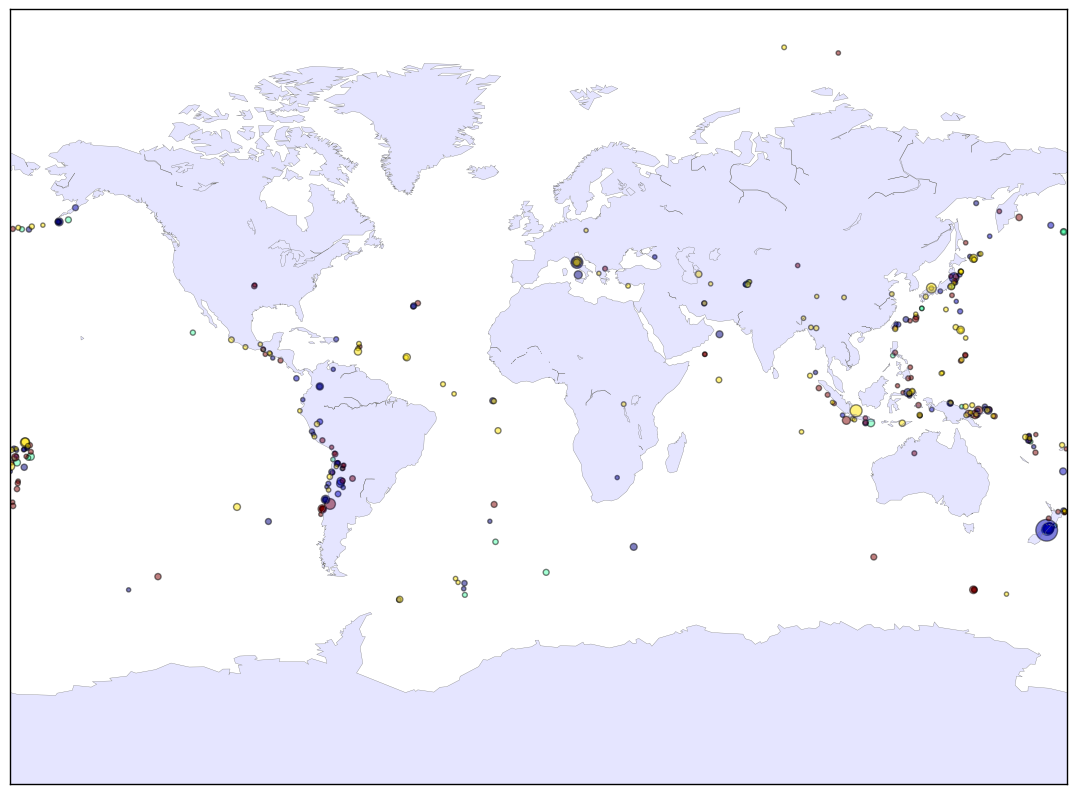

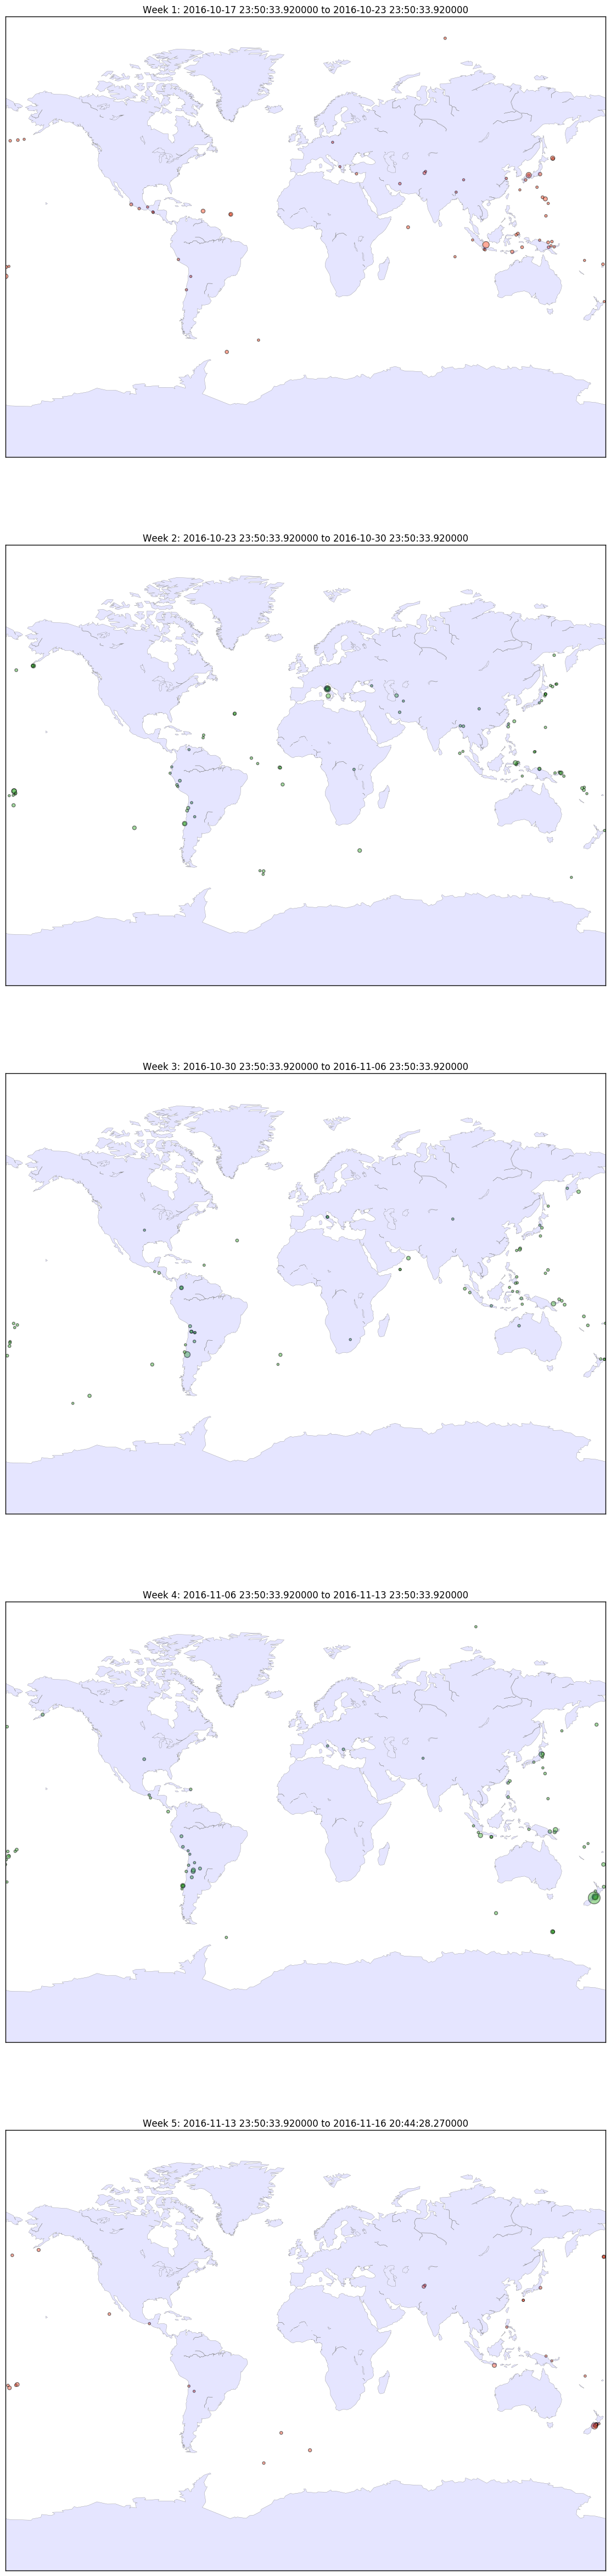

In [15]:
E = scatterPlotArray(data_45)
E.scatterMap()
E.scatterMapPeriod()